In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

from fleck import Star, generate_spots

f_S = 0.12000000000000002


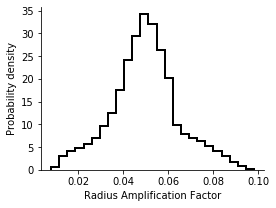

radius amplification factor = 0.04966767811417326




In [66]:

radii_range = [0.4]
u_ld = [0.4, 0.2]
s = Star(0.7, u_ld, n_phases=30)
b = 0
#planet_radius = [0.1, 0.01]

planet_radius = [0.1]
n_spots = 3
n_incs = 50000

for radii in radii_range:
    for prad in planet_radius:

        lons, lats, rads, incs = generate_spots(min_latitude=-45, max_latitude=45, spot_radius=radii, 
                                                n_spots=n_spots, inclinations=90*u.deg * np.ones(n_incs))
        f_S = radii**2 * n_spots / 4

        print(f'f_S = {f_S}')

        lcs = s.light_curve(lons, lats, rads, incs)

        lambda_max = (prad**2 * (1 - u_ld[0] * (1 - np.sqrt(1 - b**2)) - u_ld[1] * (1 - np.sqrt(1 - b**2))**2) / 
                      (1 - u_ld[0]/3 - u_ld[1]/6))
        inferred_radius = np.sqrt(lambda_max / (1-lcs.ptp(axis=0)))
        amplification_factor = (inferred_radius / lambda_max**0.5) - 1
        plt.figure(figsize=(4, 3))
        plt.hist(amplification_factor, lw=2, color='k', histtype='step', bins=25, density=True)
#         plt.yticks([])
        plt.ylabel('Probability density')
        plt.xlabel('Radius Amplification Factor')
        ax = plt.gca()
        
        for sp in 'right top'.split():
            ax.spines[sp].set_visible(False)
        plt.savefig('plots/rad_amp.pdf', bbox_inches='tight')
        plt.show()
#         amp_factor = (lambda_max / lcs.min()) / (lambda_max / lcs.max()) - 1
        print(f'radius amplification factor = {amplification_factor.mean()}\n\n')

    
    
#         plt.plot(lcs);
#         plt.show()